In [1]:
from formulas import map_splitter, bing_maps_query
from secrets import BING_MAPS_KEY
# from tqdm import tqdm_notebook
# import matplotlib.pyplot as plt
import time
import requests
import pandas as pd
import os
import json
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

In [2]:
pwd = os.getcwd()

In [3]:
coordinates = pd.read_csv(pwd + "/Square Builder.csv")
coordinates

,Unnamed: 0,Latitude,Longitude,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Upper Left,-121.59375,38.68677,NaN,factor,5.0
1,Lower Left,-121.59375,38.63677,NaN,NaN,NaN
2,Upper Right,-121.54375,38.68677,NaN,NaN,NaN
3,Lower Right,-121.54375,38.63677,NaN,NaN,NaN


In [4]:
pwd = os.getcwd()
base_url = "http://spatial.virtualearth.net/REST/v1/data/Microsoft/PointsOfInterest?"
sq_km = "1"
bing_maps_key = BING_MAPS_KEY

In [5]:
upper_left = [coordinates.iloc[0, 1], coordinates.iloc[0, 2]]
lower_left = [coordinates.iloc[1, 1], coordinates.iloc[1, 2]]
upper_right = [coordinates.iloc[2, 1], coordinates.iloc[2, 2]]
lower_right = [coordinates.iloc[3, 1], coordinates.iloc[3, 2]]

In [6]:
query_points = map_splitter(upper_left, upper_right, lower_right)

In [7]:
query_points

[['-121.584740990991', '38.677760990991'],
 ['-121.584740990991', '38.65974297297298'],
 ['-121.584740990991', '38.64172495495496'],
 ['-121.56672297297298', '38.677760990991'],
 ['-121.56672297297298', '38.65974297297298'],
 ['-121.56672297297298', '38.64172495495496'],
 ['-121.54870495495497', '38.677760990991'],
 ['-121.54870495495497', '38.65974297297298'],
 ['-121.54870495495497', '38.64172495495496'],
 ['-121.59375', '38.68677'],
 ['-121.59375', '38.668751981981984'],
 ['-121.59375', '38.650733963963965'],
 ['-121.57573198198199', '38.68677'],
 ['-121.57573198198199', '38.668751981981984'],
 ['-121.57573198198199', '38.650733963963965'],
 ['-121.55771396396398', '38.68677'],
 ['-121.55771396396398', '38.668751981981984'],
 ['-121.55771396396398', '38.650733963963965']]

In [17]:
x = [z[0] for z in query_points]
y = [a[1] for a in query_points]

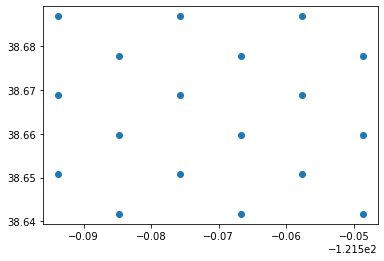

In [18]:
# plt.scatter(x, y)

In [8]:
entity_input = str(8211)
counter = 0
for i in query_points:
    to_save = bing_maps_query(i[0], i[1], 1, entity_input, bing_maps_key, base_url)

    with open(pwd + f"/{str(counter)}.txt", 'w') as outfile:
        json.dump(to_save, outfile) # Save to make sure that I don't lose data

    counter += 1

In [9]:
with open(pwd + "/7.txt") as f:
    json_data = json.load(f)
    data = json_data.get("d").get("results")

In [11]:
pd.DataFrame(data)

,__metadata,EntityID,Name,DisplayName,Latitude,Longitude,AddressLine,Locality,AdminDistrict2,AdminDistrict,PostalCode,CountryRegion,Phone,EntityTypeID,SubEntityTypeID
0,{'uri': 'http://spatial.virtualearth.net/REST/...,5057789251710615565,Natomas Child Care Center Development,Natomas Child Care Center Development,38.662104,-121.546726,720 Hawkcrest Cir,Sacramento,Sacramento,California,95835,USA,+(1)-(916)-9281777,8211,155
1,{'uri': 'http://spatial.virtualearth.net/REST/...,5057789253858099229,Westlake Charter Elementary,Westlake Charter Elementary,38.655249,-121.547640,2680 Mabry Drive,Sacramento,Sacramento,California,95834,USA,+(1)-(916)-5675760,8211,155
2,{'uri': 'http://spatial.virtualearth.net/REST/...,8500509100512116741,Paso Verde School,Paso Verde School,38.655392,-121.550858,3800 Del Paso Rd,Sacramento,Sacramento,California,95834,USA,,8211,155
3,{'uri': 'http://spatial.virtualearth.net/REST/...,5057789243623997472,Np,Np,38.654607,-121.546847,3700 Del Paso Rd,Sacramento,Sacramento,California,95834,USA,+(1)-(916)-5675762,8211,155
4,{'uri': 'http://spatial.virtualearth.net/REST/...,5057789254210420744,Natomas Charter Junior High School,Natomas Charter Junior High School,38.654610,-121.546729,,Sacramento,Sacramento,California,,USA,,8211,155
